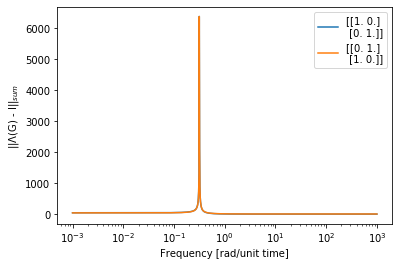

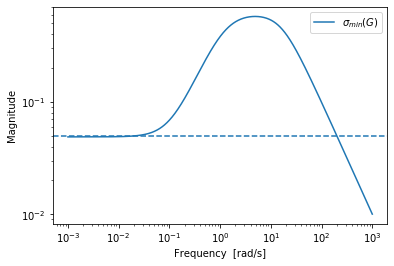

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 26 21:05:19 2015

@author: cronjej
"""

import utils
import utilsplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'white'


s = utils.tf([1, 0], 1)
A = np.asarray([[-10, 0], [0, -1]])
B = np.eye(A.shape[0])
C = np.asarray([[10., 1.1], [10., 0]])
D = np.asarray([[0., 0.], [0., 1.]])

G = utils.mimotf(C*utils.mimotf(s*np.eye(2) - A).inverse()*B + D)

# a) Controllability analysis

G_poles = G.poles()
G_rhp_poles = utils.RHPonly(G_poles)
# G has stable poles, -10 with multiplicity of 2 and -1
G_zeros = G.zeros()
G_rhp_zeros = utils.RHPonly(G_zeros)
# G has a LHP zero @ -10 and a RHP zero @ 0.1
# Zero at 0.1 limits bandwidth to wB* < 0.05

pairing1 = np.asmatrix(np.eye(2))
pairing2 = np.asmatrix(pairing1[[1, 0]])

utilsplot.rga_nm_plot(G, pairing_list=[pairing1, pairing2], 
                      pairing_names=['Diagonal pairing', 'Off diagonal pairing'],
                        w_start=-3, w_end=3, points=1000, plot_type='all')

# RGA Number of Off-diagonal pairing exhibits the lowest RGA Number for w < wB*

# b) Disturbance rejection and input saturation

w = np.logspace(-3, 3, 1000)
dim = G(0).shape[0]
Sv_G = np.zeros((len(w), dim))
Sv_G_min = np.zeros((len(w), 1))
Sv_G_max = np.zeros((len(w), 1))
wB_index = 0
for i in range(len(w)):
    _, Sv_G[i, :], _ = np.linalg.svd(G(1j*w[i]))
    Sv_G_min[i] = np.min(Sv_G[i, :])
    if w[i] > 0.05 and wB_index == 0:
        wB_index = i
        
figure = plt.figure()
plt.loglog(w, Sv_G_min, label='$\sigma_{min}(G)$')
plt.axhline(w[wB_index], linestyle='--')
plt.legend()
plt.xlabel('Frequency  [rad/s]')
plt.ylabel('Magnitude')

plt.show()

# Note that minimum singular value of G(iw) where w < wB* is located at steady state (w=0)

u, _, _ = np.linalg.svd(G(0))

# Most difficult output direction
u_min = u[:, 1]

# Unsure of how to form gd with given information, cannot determine gd = y/d

# TODO Complete section b

# c) Decentralized control

# As mentioned in a), the off-diagonal pairing exhibits the lowest RGA number
# over the bandwidth frequency (see figure 1)
